<a href="https://colab.research.google.com/github/GnokRacso/TARUC-Data-Hackathon-2020/blob/main/tilda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A11 

## Kong Mun Jun & Wong Yew Lee

` ## Textile Defects Detection ## `

### Installing Dependencies, Importing Folder and Import Libraries

In [ ]:


#!pip install opencv-python
#!pip install tensorflow
#pip install ipython-autotime    ##to calculate run time

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

%load_ext autotime

In [ ]:
my_data_dir = '../c1data/'
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

image_shape = (768,512,1)
batch_size = 32


time: 993 µs


### Viewing Imported Sample

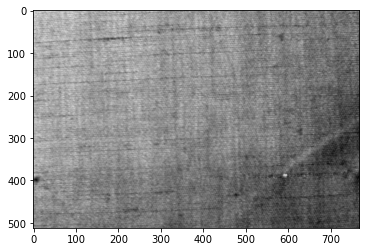

time: 393 ms


In [ ]:
##view sample
img = plt.imread ('../c1data/train/def/c1r1e1n1.tif')
plt.figure(figsize=(12,4))
plt.imshow(img, cmap="gray")

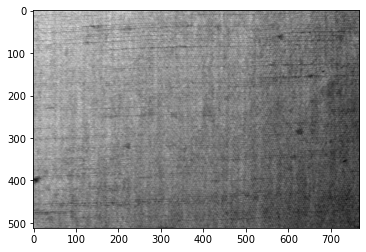

time: 415 ms


In [ ]:
img1 = plt.imread('../c1data/train/ok/c1r1e0n9.tif')
plt.figure(figsize=(12,4))
plt.imshow(img1, cmap='gray')

### Preparing Pipeline for Image

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255,
                              fill_mode='nearest',
                              horizontal_flip=True)# Rescale the image by normalzing it)

time: 998 µs


In [ ]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 908 images belonging to 2 classes.
Found 241 images belonging to 2 classes.
time: 371 ms


In [ ]:
train_set.class_indices

{'def': 0, 'ok': 1}

time: 3 ms


### Creating Model 

In [ ]:
#Creating model

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

time: 876 ms


### A Summary of Model

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 766, 510, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 383, 255, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 381, 253, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 190, 126, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 188, 124, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 94, 62, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93248)             0

### Fitting data into model

In [ ]:
results = model.fit_generator(train_set,epochs=10,
                              validation_data=test_set,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
29/29 [==============================] - 192s 7s/step - loss: 0.9205 - accuracy: 0.6762 - val_loss: 0.5890 - val_accuracy: 0.7469
Epoch 2/10
29/29 [==============================] - 179s 6s/step - loss: 0.6033 - accuracy: 0.7335 - val_loss: 0.5929 - val_accuracy: 0.7469
Epoch 3/10
29/29 [==============================] - 183s 6s/step - loss: 0.5926 - accuracy: 0.7335 - val_loss: 0.5889 - val_accuracy: 0.7469
Epoch 4/10
29/29 [==============================] - 184s 6s/step - loss: 0.5906 - accuracy: 0.7335 - val_loss: 0.5709 - val_accuracy: 0.7469
Epoch 5/10
29/29 [==============================] - 185s 6s/step - loss: 0.5847 - accuracy: 0.7335 - val_loss: 0.5961 - val_accuracy: 0.7469
Epoch 6/10
29/29 [==============================] - 194s 7s/step - loss: 0.5967 - accuracy: 0.7335 - val_loss: 0.5926 - val_accuracy: 0.7469
time: 19min 20s


### Analyzing Model Performance

In [ ]:
#analyzing model performance

losses = pd.DataFrame(model.history.history)

time: 95.6 ms


In [ ]:
losses.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.920483,0.676211,0.589000,0.746888
1,0.603293,0.733480,0.592931,0.746888
2,0.592580,0.733480,0.588869,0.746888
3,0.590588,0.733480,0.570913,0.746888
4,0.584718,0.733480,0.596072,0.746888


time: 195 ms


### Visualzing Losses and Accuracy

<AxesSubplot:>

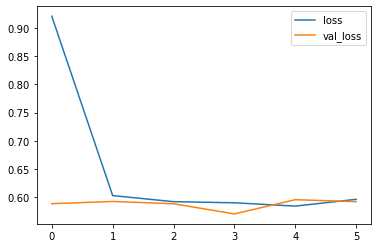

time: 548 ms


In [ ]:
#visualizing losses

losses[['loss','val_loss']].plot()

<AxesSubplot:>

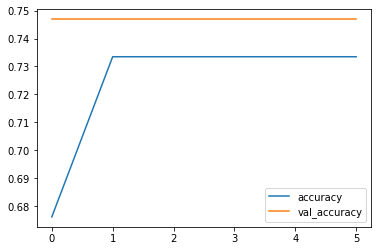

time: 306 ms


In [ ]:
losses[['accuracy','val_accuracy']].plot()

### Predicting using model

In [ ]:
#first we will find predict probability
pred_probability = model.predict(test_set)

time: 17.2 s


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 7 ms


### Confusion matrix and clasification report

In [ ]:
predictions = pred_probability > 0.5
#if model predict greater than 0.5 it conveted to 1 means ok_front

print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       180
           1       0.00      0.00      0.00        61

    accuracy                           0.75       241
   macro avg       0.37      0.50      0.43       241
weighted avg       0.56      0.75      0.64       241

time: 51 ms


<AxesSubplot:>

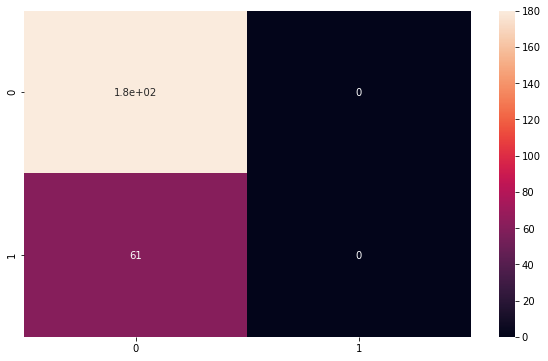

time: 448 ms


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

### Testing Model With Input Images

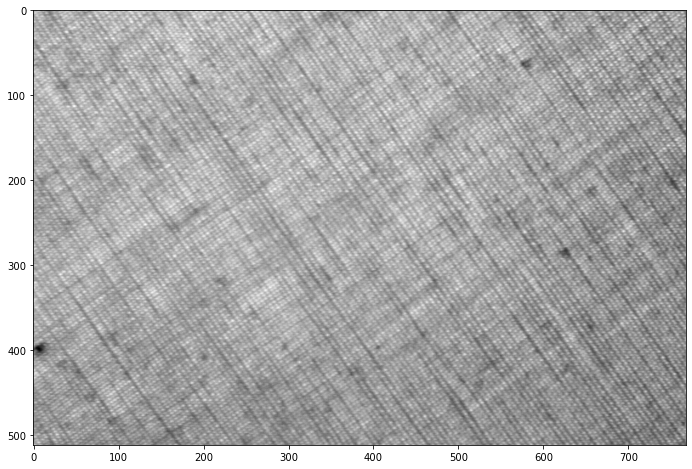

time: 558 ms


In [ ]:
## Test input with test images

img = cv2.imread(test_path+'ok/c1r3e0n28.tif',0)
img = img/255 #rescalinng
pred_img =img.copy()

plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

defect


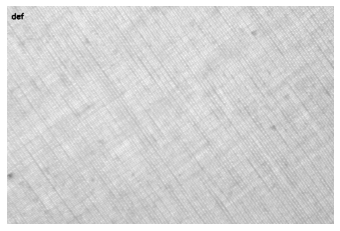

time: 358 ms


In [ ]:
prediction = model.predict(img.reshape(-1,768,512,1))
if (prediction<0.5):
    print("defect")
    cv2.putText(pred_img, "def", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok")
    cv2.putText(pred_img, "ok", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

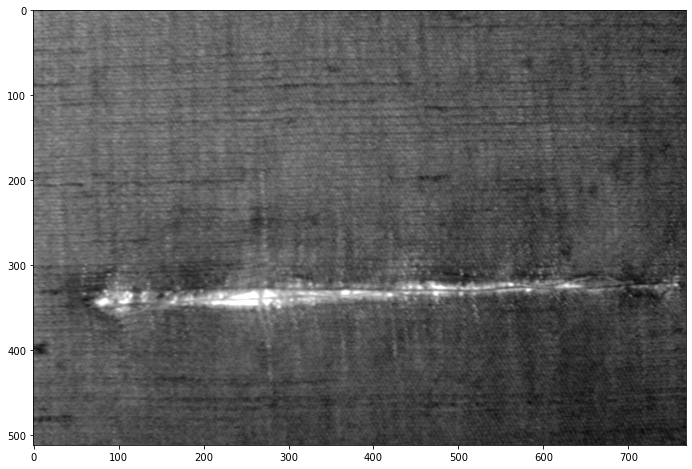

time: 1.04 s


In [ ]:
img1 = cv2.imread(test_path+'def/c1r1e1n45.tif',0)
img1 = img1/255
pred_img1 =img1.copy()

plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')



In [ ]:
model.predict_proba(img.reshape(1,768,512,1))

Instructions for updating:
Please use `model.predict()` instead.


array([[0.3605818]], dtype=float32)

time: 170 ms


def_front


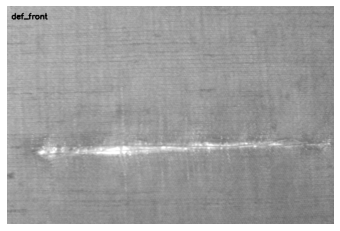

time: 370 ms


In [ ]:
prediction = model.predict(img1.reshape(-1,768,512,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

## Conclusion : 

> This model cannot be deployed for production usage as model is not accurate. 